In [34]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [36]:

iris = load_iris()
X = iris.data[:,(2,3)] #petal length, petal width
y = (iris.target == 0).astype(np.int) # iris setosa?
print('\n--------------------Perceptron----------------------')
per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2,0.5]])
print(f'y_pred of (2,0.5)--> {y_pred}')



--------------------Perceptron----------------------
y_pred of (2,0.5)--> [0]


C:\Users\JULIA~1.VIC\AppData\Local\Temp/ipykernel_7532/673619471.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # iris setosa?


In [37]:

print('\n--------------------MultiLayer Perceptron----------------------')
# Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(f'X_train_full shape--> {X_train_full.shape}')
print(f'X_train_full dtype--> {X_train_full.dtype}')


--------------------MultiLayer Perceptron----------------------
X_train_full shape--> (60000, 28, 28)
X_train_full dtype--> uint8


In [38]:
#scaling the input features (because we're going to use gradient descent) 
# and creating a validation set
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

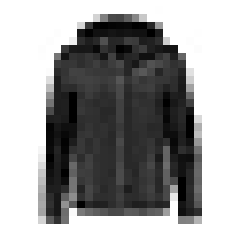

In [39]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [40]:
# adding names to the label values
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [41]:
print(f'class_names --> {class_names}')
print(f'\nclass_names[y_train[0] --> {class_names[y_train[0]]}\n')

class_names --> ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names[y_train[0] --> Coat



Saving figure fashion_mnist_plot


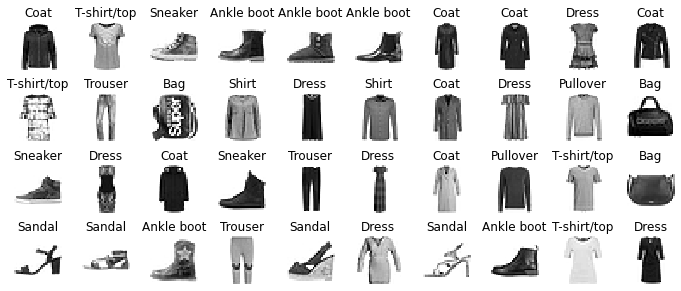

In [42]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

# Creating a model using Sequential API (NEURAL NETWORK)

In [43]:

model = keras.models.Sequential() #simplest kinf of neural net in Keras; one stack of layers connected sequentially
model.add(keras.layers.Flatten(input_shape=[28, 28])) # convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [44]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
### or ####
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [46]:
model.layers

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [48]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [49]:
model.get_layer('dense') is hidden1

True

In [50]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [51]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [52]:
biases.shape


(300,)

In [53]:
weights.shape

(784, 300)

In [54]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [24]:
# training and evaluating
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5330 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8569 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8619 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3707 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3633 - accuracy: 0.8714 - val_loss: 0.3627 - val_accuracy:

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

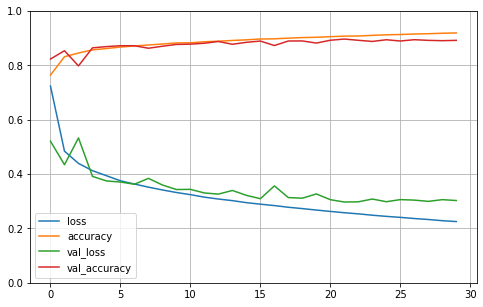

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)#set the vertical range to [0-1]
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 79.1287 - accuracy: 0.8292


[79.12869262695312, 0.829200029373169]

### Making predictions 

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


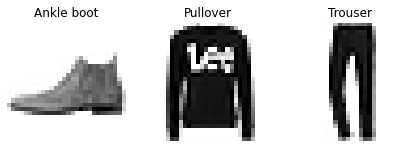

In [32]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

Building complex models using the functional API

In [57]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7987 - val_loss: 0.6806
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5335 - val_loss: 0.5710
Epoch 3/20
363/363 [==============================] - 0s 926us/step - loss: 0.6129 - val_loss: 0.4964
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4694 - val_loss: 0.4785
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4462 - val_loss: 0.4615
Epoch 6/20
363/363 [==============================] - 0s 937us/step - loss: 0.4350 - val_loss: 0.4553
Epoch 7/20
363/363 [==============================] - 0s 901us/step - loss: 0.4263 - val_loss: 0.4433
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4182 - val_loss: 0.4446
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4116 - val_loss: 0.4326
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4080 - val_loss: 

In [58]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [60]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.9263 - val_loss: 0.8637
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7295 - val_loss: 0.6943
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6739 - val_loss: 0.6506
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6165 - val_loss: 0.6147
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5959 - val_loss: 0.5848
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5570 - val_loss: 0.5611
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5342 - val_loss: 0.5414
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5167 - val_loss: 0.5274
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5040 - val_loss: 0.5149
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4924 - val_loss: 0.5050

In [61]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [62]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8477 - val_loss: 0.9433
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8274 - val_loss: 0.7340
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6994 - val_loss: 0.6661
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6445 - val_loss: 0.6275
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6084 - val_loss: 0.5982
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5811 - val_loss: 0.5781
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5591 - val_loss: 0.5581
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5405 - val_loss: 0.5437
Epoch 9/20
363/363 [==============================] - 0s 922us/step - loss: 0.5250 - val_loss: 0.5306
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5126 - val_loss: 0.52

## Subclassing API

In [63]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [64]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 2.6012 - output_1_loss: 2.3708 - output_2_loss: 4.6743 - val_loss: 1.2753 - val_output_1_loss: 1.0061 - val_output_2_loss: 3.6978
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 1.1080 - output_1_loss: 0.9027 - output_2_loss: 2.9554 - val_loss: 0.9449 - val_output_1_loss: 0.7783 - val_output_2_loss: 2.4448
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8795 - output_1_loss: 0.7423 - output_2_loss: 2.1150 - val_loss: 0.8223 - val_output_1_loss: 0.7019 - val_output_2_loss: 1.9060
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7863 - output_1_loss: 0.6784 - output_2_loss: 1.7579 - val_loss: 0.7588 - val_output_1_loss: 0.6584 - val_output_2_loss: 1.6630
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7326 - output_1_loss: 0.6372 - output_2_loss: 1.5910 - val_loss: 0.7166 - val_output_1_loss: 0.6257 - val_ou

## Saving and Restoring a Model

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [66]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.5423 - val_loss: 0.7685
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7139 - val_loss: 0.6872
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6555 - val_loss: 0.6484
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6193 - val_loss: 0.6175
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5904 - val_loss: 0.5906
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5655 - val_loss: 0.5687
Epoch 7/10
363/363 [==============================] - 0s 992us/step - loss: 0.5451 - val_loss: 0.5514
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5281 - val_loss: 0.5357
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5140 - val_loss: 0.5231
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.5116


In [67]:
model.save("my_keras_model.h5")

In [68]:
model = keras.models.load_model("my_keras_model.h5")

## Saving checkpoints: Callbacks

In [71]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [72]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [73]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8688 - val_loss: 0.7796
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7040 - val_loss: 0.6453
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6180 - val_loss: 0.6001
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5762 - val_loss: 0.5717
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5496 - val_loss: 0.5476
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5267 - val_loss: 0.5303
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5100 - val_loss: 0.5157
Epoch 8/10
363/363 [==============================] - 0s 981us/step - loss: 0.4960 - val_loss: 0.5045
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4856 - val_loss: 0.4955
Epoch 10/10
162/162 [==============================] - 0s 818us/step - loss: 0.4842


In [74]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4696 - val_loss: 0.4839
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4642 - val_loss: 0.4775
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4595 - val_loss: 0.4728
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4550 - val_loss: 0.4719
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4533 - val_loss: 0.4663
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4484 - val_loss: 0.4643
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4457 - val_loss: 0.4614
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4428 - val_loss: 0.4594
Epoch 9/100
363/363 [==============================] - 0s 995us/step - loss: 0.4407 - val_loss: 0.4571
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4388 - val_

In [75]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [76]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 0s 1ms/step - loss: 0.3531 - val_loss: 0.3790

val/train: 1.07
